# Simulation of COVID pandemic on a bilayer network


In [1]:
%load_ext autoreload
%autoreload 2

from scripts.network import create_bilayer_network
from scripts.epidemic_layer import initialize_epidemic
from scripts.virtual_layer import initialize_virtual

import networkx as nx

import scripts.visualization as viz

viz.load_matplotlib()
plt = viz.plt

N_AGENTS = 50
N_ADDITIONAL_VIRTUAL_LINKS = 100
INIT_INFECTED_FRACTION = 0.2
INIT_AWARE_FRACTION = 0.3

l1_layer, l2_layer = create_bilayer_network(N_AGENTS, N_ADDITIONAL_VIRTUAL_LINKS)

In [2]:
l1_layer_init = initialize_epidemic(l1_layer, INIT_INFECTED_FRACTION)
l2_layer_init = initialize_virtual(l2_layer, INIT_AWARE_FRACTION)

In [3]:
from scripts.metrics import pearson_coefficient_between_layers

pearson_coefficient_between_layers(l1_layer_init, l2_layer_init)

0.9748060526633783

C:\Users\studia\Desktop\social-media-influence-on-covid-pandemic\scripts\visualization.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, bbox_inches='tight', dpi=300)


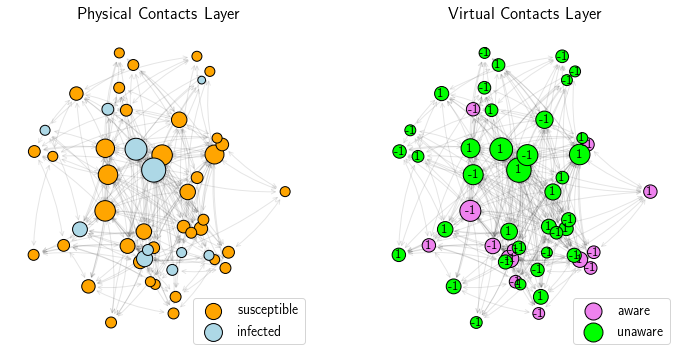

In [32]:
def remove_directed_links(g: nx.Graph):
    set_list = [set(a) for a in g.edges()]
    remove_list = []
    for i in range(len(set_list)):
        edge = set_list.pop(0)
        if set_list.count(edge) > 0:
            u,v = edge
            remove_list.append((v, u))
    g.remove_edges_from(remove_list)
    return g

l1_tmp = remove_directed_links(l1_layer_init.to_directed())
l2_tmp = remove_directed_links(l2_layer_init.to_directed())

pos = nx.kamada_kawai_layout(l1_tmp, scale=3)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

viz.draw_epidemic_layer(l1_tmp, pos=pos, ax=axs[0], node_border_width=1.0, node_size_scale=20)
axs[0].set_axis_off()
axs[0].set_title('Physical Contacts Layer')
axs[0].legend()

viz.draw_virtual_layer(l2_tmp, pos=pos, ax=axs[1], node_border_width=1.0, node_size_scale=20)
axs[1].set_title('Virtual Contacts Layer')
axs[1].set_axis_off()
axs[1].legend()

# viz.save_figure("../plots/initial_network_state.png")
plt.show()

In [2]:
from scripts.age_statistics import generate_from_age_gender_distribution

males = generate_from_age_gender_distribution(int(16e6), 'M')
females = generate_from_age_gender_distribution(int(16e6), 'F')

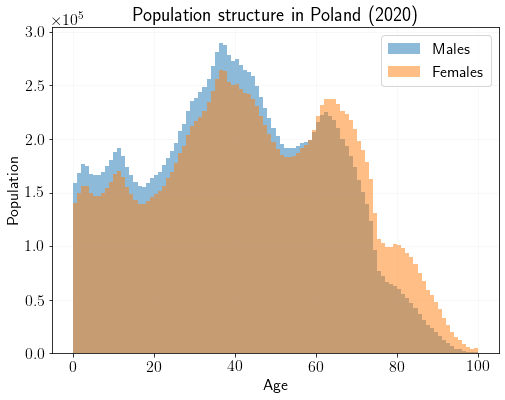

In [5]:
from matplotlib import ticker

_, ax = plt.subplots()
plt.grid(alpha=0.1)
ax.hist(males, bins=100, alpha=0.5, label='Males')
ax.hist(females, bins=100, alpha=0.5, label='Females')
ax.set_xlabel('Age')
ax.set_ylabel('Population')
ax.set_title('Population structure in Poland (2020)')
yfmt = ticker.ScalarFormatter(useMathText=True)
yfmt.set_powerlimits((3, 4))
ax.yaxis.set_major_formatter(yfmt)
ax.legend()
# viz.save_figure("../plots/poland_population_age_distribution.pdf")
plt.show()

In [9]:
from scripts.experiments import perform_simulation

output_metrics, l1_new, l2_new = perform_simulation()

Step: 0 / 20000
Step: 2000 / 20000
Step: 4000 / 20000
Step: 6000 / 20000
Step: 8000 / 20000
Step: 10000 / 20000
Step: 12000 / 20000
Step: 14000 / 20000
Step: 16000 / 20000
Step: 18000 / 20000


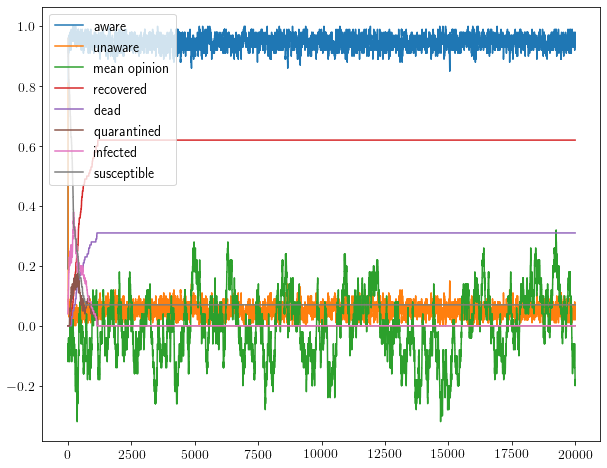

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(output_metrics['aware_ratio'], label='aware')
plt.plot(output_metrics['unaware_ratio'], label='unaware')
plt.plot(output_metrics['mean_opinion'], label='mean opinion')
plt.plot(output_metrics['recovered_ratio'], label='recovered')
plt.plot(output_metrics['dead_ratio'], label='dead')
plt.plot(output_metrics['quarantined_ratio'], label='quarantined')
plt.plot(output_metrics['infected_ratio'], label='infected')
plt.plot(output_metrics['susceptible_ratio'], label='susceptible')
plt.legend()
plt.show()

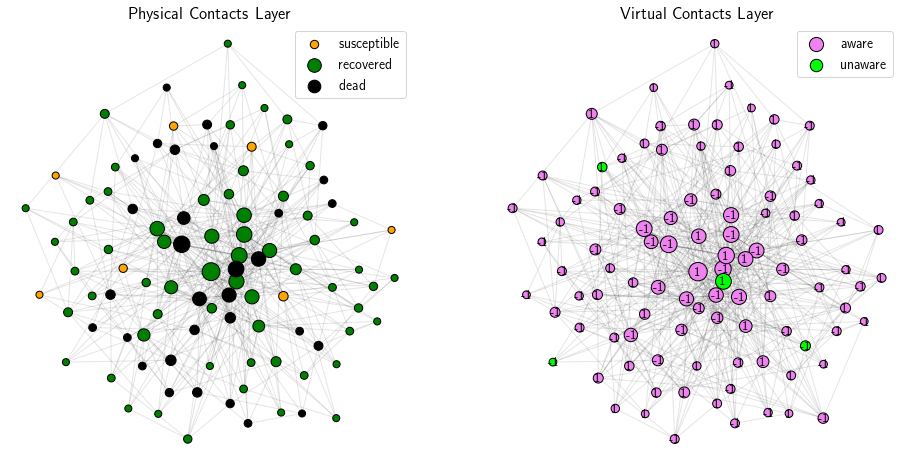

In [11]:
pos = nx.spring_layout(l1_new, k=0.05, iterations=200)
_, axs = plt.subplots(1, 2, figsize=(16, 8))

viz.draw_epidemic_layer(l1_new, pos=pos, ax=axs[0], node_border_width=1.0)
axs[0].set_axis_off()
axs[0].set_title('Physical Contacts Layer')
axs[0].legend()

viz.draw_virtual_layer(l2_new, pos=pos, ax=axs[1], node_border_width=1.0)
axs[1].set_title('Virtual Contacts Layer')
axs[1].set_axis_off()
axs[1].legend()

plt.show()


